In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('zomato.csv',encoding='latin-1')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [5]:
df['Locality Verbose'][0]

'Century City Mall, Poblacion, Makati City, Makati City'

In [6]:
df['Locality'][0]

'Century City Mall, Poblacion, Makati City'

In [7]:
df['Is delivering now']

0       No
1       No
2       No
3       No
4       No
        ..
9546    No
9547    No
9548    No
9549    No
9550    No
Name: Is delivering now, Length: 9551, dtype: object

In [8]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [9]:
df['Restaurant ID']=df['Restaurant ID'].astype(str)
df['Country Code']=df['Country Code'].astype(str)

In [10]:
df.describe()

,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [11]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [12]:
df[df['Average Cost for two']==0].head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
84,17284105,Cookie Shoppe,216,Albany,"115 N Jackson St, Albany, GA 31701",Albany,"Albany, Albany",-84.1540,31.5772,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,34
85,17284302,El Vaquero Mexican Restaurant,216,Albany,"2700 Dawson Rd, Albany, GA 31707",Albany,"Albany, Albany",-84.2194,31.6158,Mexican,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,45
87,17284211,Pearly's Famous Country Cookng,216,Albany,"814 N Slappey Blvd, Albany, GA 31701",Albany,"Albany, Albany",-84.1759,31.5882,NaN,0,Dollar($),No,No,No,No,1,3.4,Orange,Average,36
201,17330155,Deorio's,216,Columbus,"3201 Macon Rd Ste 167, Columbus, GA 31906",Columbus,"Columbus, Columbus",-84.9427,32.4810,"Italian, Pizza",0,Dollar($),No,No,No,No,1,4.0,Green,Very Good,170
240,17334679,Azteca,216,Davenport,"4811 N Brady St Ste 3, Davenport, IA 52806",Davenport,"Davenport, Davenport",-90.5683,41.5699,Mexican,0,Dollar($),No,No,No,No,1,4.3,Green,Very Good,167


In [13]:
df[(df['Average Cost for two']==0) & ((df['Has Table booking']!='No') | (df['Has Online delivery']!='No'))].count()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [14]:
[feature for feature in df.columns if df[feature].isnull().sum() >0]

['Cuisines']

<AxesSubplot:>

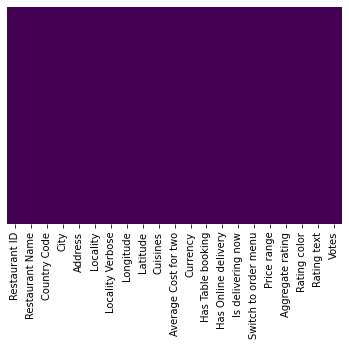

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False, cmap='viridis')

In [16]:
df_country = pd.read_excel('Country-Code.xlsx')

In [17]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [18]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [19]:
df_country['Country Code']= df_country['Country Code'].astype(str)

In [20]:
final_df=pd.merge(df,df_country,on='Country Code',how='left')

In [21]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [22]:
final_df['Country'].value_counts()

India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Sri Lanka           20
Qatar               20
Canada               4
Name: Country, dtype: int64

([<matplotlib.patches.Wedge at 0x1f294a62250>,
 [Text(-1.052256163793291, 0.3205572737577906, 'India'),
  Text(0.9911329812843455, -0.477132490415823, 'United States'),
  Text(1.0572858296119743, -0.3035567072257165, 'United Kingdom'),
  Text(1.070138816916019, -0.2545641619112621, 'Brazil'),
  Text(1.0793506814479759, -0.21213699926648824, 'UAE'),
  Text(1.086881147244973, -0.16937937230799818, 'South Africa'),
  Text(1.0918635911832035, -0.1335436192729486, 'New Zealand'),
  Text(1.0947903814016446, -0.10692998078388304, 'Turkey'),
  Text(1.096631023945382, -0.08602556201794338, 'Australia'),
  Text(1.0978070729776455, -0.06942355882735218, 'Phillipines'),
  Text(1.0986791544015209, -0.05388984768543213, 'Indonesia'),
  Text(1.0993059848742366, -0.039068550263413035, 'Singapore'),
  Text(1.0997248508282123, -0.02460187941736628, 'Sri Lanka'),
  Text(1.0999533462179636, -0.010130949802716446, 'Qatar'),
  Text(1.0999990477553414, -0.0014473898376707638, 'Canada')])

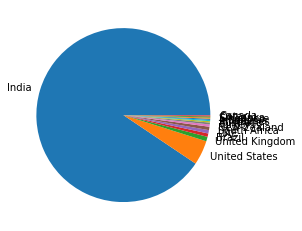

In [23]:
plt.pie(final_df['Country'].value_counts().values,labels= final_df['Country'].value_counts().index)

([<matplotlib.patches.Wedge at 0x1f294b27940>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')])

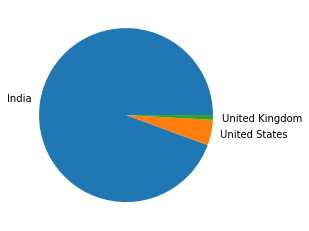

In [24]:
## Only Top 3 country
plt.pie(final_df['Country'].value_counts().values[:3],labels= final_df['Country'].value_counts().index[:3])

([<matplotlib.patches.Wedge at 0x1f294b6ac70>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

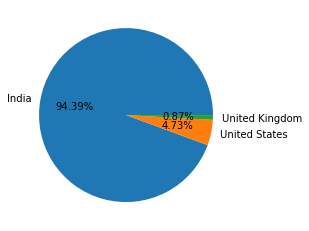

In [25]:
plt.pie(final_df['Country'].value_counts().values[:3],labels= final_df['Country'].value_counts().index[:3],autopct='%1.2f%%')

#### Observations
Zomato is the most popular and has the largest partner network in India

In [26]:
final_df.groupby(['Aggregate rating','Rating color','Rating text'])

In [27]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()

Aggregate rating  Rating color  Rating text
0.0               White         Not rated      2148
1.8               Red           Poor              1
1.9               Red           Poor              2
2.0               Red           Poor              7
2.1               Red           Poor             15
2.2               Red           Poor             27
2.3               Red           Poor             47
2.4               Red           Poor             87
2.5               Orange        Average         110
2.6               Orange        Average         191
2.7               Orange        Average         250
2.8               Orange        Average         315
2.9               Orange        Average         381
3.0               Orange        Average         468
3.1               Orange        Average         519
3.2               Orange        Average         522
3.3               Orange        Average         483
3.4               Orange        Average         498
3.5               Ye

In [28]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [29]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Count'})

,Aggregate rating,Rating color,Rating text,Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [30]:
ratings_df = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Count'})

#### Observations
Ratings   ----> Ratings Text <br>
4.5 - 4.9 ----> Excellent <br>
4.0 - 4.4 ----> Very Good <br>
3.5 - 3.9 ----> Good <br>
2.5 - 3.4 ----> Average <br>
0.1 - 2.4 ----> Poor <br>

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

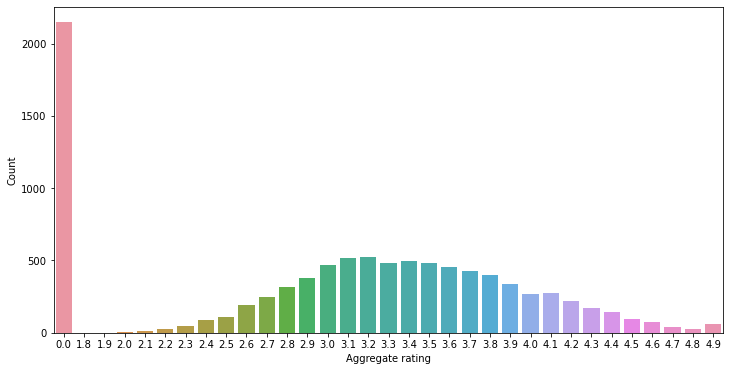

In [31]:
import matplotlib
matplotlib.rcParams['figure.figsize']= (12,6)
sns.barplot(x='Aggregate rating',y='Count',data=ratings_df)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

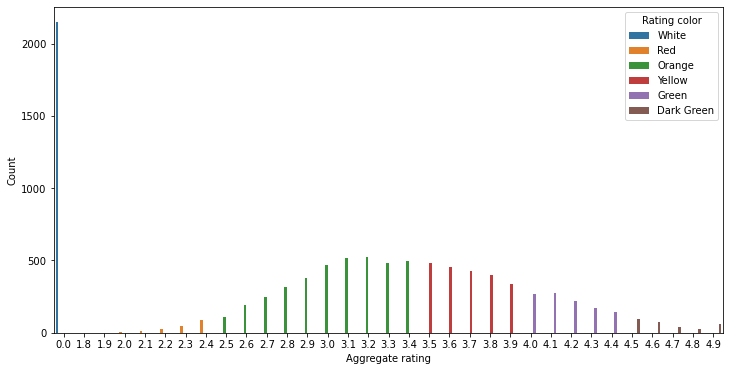

In [32]:
sns.barplot(x='Aggregate rating',y='Count',data=ratings_df,hue='Rating color')

In [33]:
l1=list(ratings_df['Rating color'].unique())
l1 = [elem.lower() for elem in l1]
l1[-1]= 'green'  # dark green is not a valid color in color_pallete function

<AxesSubplot:xlabel='Aggregate rating', ylabel='Count'>

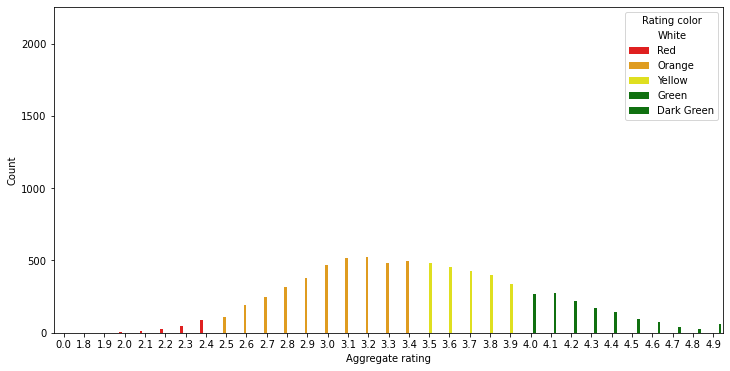

In [34]:
sns.barplot(x='Aggregate rating',y='Count',data=ratings_df,hue='Rating color',palette=l1)

#### Observations
1. maximum records are not rated. <br>
2. among those rated, ratings between 2.8 and 3.8 have the highest frequency <br>

<AxesSubplot:xlabel='Rating color', ylabel='count'>

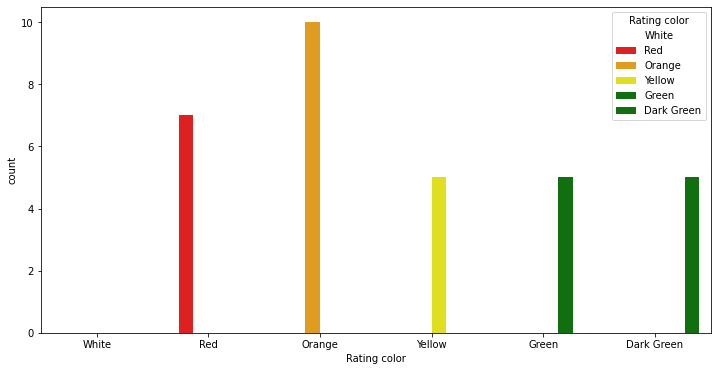

In [35]:
sns.countplot(x='Rating color',data=ratings_df,hue='Rating color',palette=l1)

In [36]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [37]:
# Find the countries that have given zero ratings
final_df[final_df['Aggregate rating']==0]['Country'].value_counts()

India             2139
Brazil               5
United States        3
United Kingdom       1
Name: Country, dtype: int64

#### Observations
Most Indian restaurants have not received any ratings

In [38]:
# Country and Currency
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [39]:
# which countries have online delivery
final_df[final_df['Has Online delivery']!='No'].groupby(['Country']).size().reset_index()

,Country,0
0,India,2423
1,UAE,28


In [40]:
# which countries don't have online delivery
final_df[final_df['Has Online delivery']=='No'].groupby(['Country']).size().reset_index()

,Country,0
0,Australia,24
1,Brazil,60
2,Canada,4
3,India,6229
4,Indonesia,21
5,New Zealand,40
6,Phillipines,22
7,Qatar,20
8,Singapore,20
9,South Africa,60


#### Observations
Online delivery is only available in India and UAE


([<matplotlib.patches.Wedge at 0x1f2959a7460>,
 [Text(-1.079055178053478, 0.21363502221306527, 'India'),
  Text(1.0676486633072917, -0.26481376802982426, 'United States'),
  Text(1.0974500606462831, -0.07485562361953522, 'United Kingdom'),
  Text(1.0997704220141564, -0.022472624742216625, 'Brazil')])

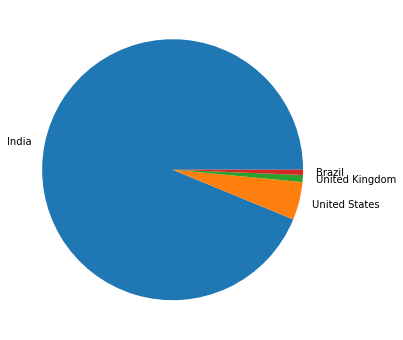

In [41]:
plt.pie(final_df['Country'].value_counts().values[:4], labels= final_df['Country'].value_counts().index[:4])

([<matplotlib.patches.Wedge at 0x1f2959eaf40>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')])

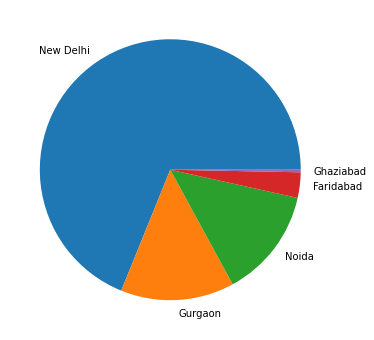

In [42]:
plt.pie(final_df['City'].value_counts().values[:5], labels= final_df['City'].value_counts().index[:5])

#### Observations
Zomato has most restaurant partners in New Delhi

In [43]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [44]:
## Average cost by Country
final_df.groupby('Country')['Average Cost for two'].mean().reset_index()

,Country,Average Cost for two
0,Australia,24.083333
1,Brazil,134.666667
2,Canada,36.250000
3,India,623.370319
4,Indonesia,281190.476190
5,New Zealand,69.750000
6,Phillipines,1606.818182
7,Qatar,223.750000
8,Singapore,155.750000
9,South Africa,419.733333


as the cost is in different national currency, it is not possible to compare the cost as it is.

In [48]:
## the currency for Phillipines is wrong, Rectify it
def change_currency(country,currency):
    if country=='Phillipines':
        return 'Philippine peso(₱)'
    else:
        return currency

    
final_df['Currency']= final_df.apply(lambda x: change_currency(x['Country'],x['Currency']),axis=1)

In [50]:
final_df.groupby(['Country','Currency']).size().reset_index()

,Country,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Philippine peso(₱),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [54]:
final_df.groupby(['Country','Currency'])['Average Cost for two'].mean().reset_index()

,Country,Currency,Average Cost for two
0,Australia,Dollar($),24.083333
1,Brazil,Brazilian Real(R$),134.666667
2,Canada,Dollar($),36.250000
3,India,Indian Rupees(Rs.),623.370319
4,Indonesia,Indonesian Rupiah(IDR),281190.476190
5,New Zealand,NewZealand($),69.750000
6,Phillipines,Philippine peso(₱),1606.818182
7,Qatar,Qatari Rial(QR),223.750000
8,Singapore,Dollar($),155.750000
9,South Africa,Rand(R),419.733333
